# Math 425 Computation Linear Algebra
## Final Project, Problem 3.
##### *Topics in Matrix Transformation, Least-squares, Linear Modelling and Singular Vaule Decomposition.

### Group 3

+ Anneke Moeller; code review/validation, math discussion and research
+ Shem Cheng; planning and discussion
+ Rai’d Muhammad; planning
+ Brent Thorne; software and reporting

### Problem 3. Classification of Handwritten Digits

##### The goal is to indentify handwitten Digits

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing
import cmath

### Manifest of data files of handwritten digits:
- handwriting training set.txt: 4000 training examples of handwritten digits. Each
training example is a 20 pixel by 20 pixel grayscale image of a digit reshaped into
a 400-dimensional vector. Each pixel is represented by a floating point number that
indicates the grayscale intensity at that location. Thus the set is a 4000 by 400 matrix.
- handwriting training set labels.txt: This data set contains the labels of the corresponding digits in the training set. The digits “1” to “9” are labeled as they are.
However, because MATLAB has no zero index, the digit zero is represented as the
value ten, i.e. “0” is labeled as “10.”
- handwriting test set.txt: 1000 test set of handwritten digits with the same format
as the training set. Thus this set is a 1000 by 400 matrix.
- handwriting test set labels.txt: The labels for the test set.

In [2]:
import csv

def file_injest(info):
    fdataset, fresults, shape = info
    """
    injest data and results files, shape not presently used (might add assert if data not in epected shape)
    """
    fname = path+'/'+fdataset
    mylist = []
    with open(fname) as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
                mylist.append(row)
    data = np.array(mylist)
    data = data.astype(float)

    fname = path+'/'+fresults
    mylist = []
    with open(fname) as f:
        reader = csv.reader(f, delimiter='\n')
        for row in reader:
                mylist.append(row)
    results = np.array(mylist)  
    results = results.astype(int)
    results = np.where(results == 10, 0, results) # fix up zero label
    assert len(results) == len(data) # valid training data is labeled

    # generate ordered list of data indices
    indices = [] 
    for n in range(10):
        indices.append(np.where(results==n)[0]) # collect indices for each digit 'result'

    return data, indices, results

In [3]:
def show(r):
    r.shape = (20,20) # our data is an array, reshape it into a 20x20 matrix 
    R = r.T # transpose for humans
    plt.imshow(R, cmap=plt.get_cmap('gray')) # show the humans... more than that, it shows our basis direction
    plt.grid(); plt.gca().set_aspect("equal") 

In [4]:
path = 'data' # this is rather sloppy, we're assigning a global varible to be used above #FIXME
validation_info = ['handwriting_test_set.txt', 'handwriting_test_set_labels.txt', (4000,20,20)]
training_info =  ('handwriting_training_set.txt', 'handwriting_training_set_labels.txt', (1000,20,20))

In [5]:
data, indices, results = file_injest(training_info)
vdata, vindices, vresults = file_injest(validation_info) # Error ratio: 0.043 (k=20)
#vdata, vindices, vresults = file_injest(training_info)  # Error ratio: 0.02475 (k=20)

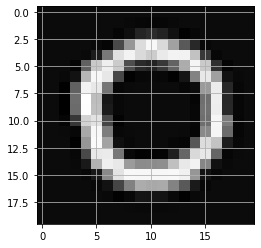

In [6]:
# show a sample of the data
data.shape,
show(data[399])

### A. Construct an algorithm for classification of handwritten digits.

In [17]:
# find singular values for the 400 samples of each character 
val = []
for n in range(10):
    A = (data[indices[n]]).transpose()  # transpose the 400x400 matrix so we can easily see, Av=UW (where W is s)
    u,s,vh = np.linalg.svd(A, full_matrices=False)
    val.append([u,s,vh]) # only use the singular vaules
#print(val[0][1]) # show a test sigma

####  Do the classication using 5, 10, 15 and 20 singular vectors as a basis.

In [40]:
# truncate U 
#k = 20
K = [5,10,15,20]
percent_error = []
misclassified = []

for k in K:
    It = np.zeros((400,400))
    for i in range(k):
        It[i,i]=1

    # now apply this to our validation set
    colBasis = [] # build our basis, not sure if colBasis a good term for this...
    for i in range(10):
        U = val[i][0] @ It
    #    print(U.shape)
        colBasis.append(U @ U.transpose())  # See Example 7.4.8 in Lay text.
    # * Note that for this truncated U, U.T*U = I, however U*U.T ≠ I
    # * We ought to be able to form an other basis using V but it hurts my head to think about it...

    # now test our validation set
    error_count=0
    testSize = len(vdata)
    for i in range(testSize): 
        y = (vdata[i]).transpose()
        r = vresults[i] #known value
        dict = {}
        for ii in range(10):
            y_hat = colBasis[ii] @ y # our projection of y onto ColA (U*U.T)
            z = (y - y_hat)
            dict[ii] =  z.dot(z)
    #        print(dict[ii])
        sorted_dict = sorted(dict.items(), key= lambda x:x[1], reverse=False)
        prediction = sorted_dict[0][0] #predicted value

        if (prediction != r): 
            error_count += 1
            if k == 20:
                misclassified.append([i, list(r)[0], prediction]) # [ index, expected, predicted, ]
    #        print(f'Expected: {r[0]} got {prediction}')
    #        display(sorted_dict)

#    print(f'Error ratio: {error_count/testSize} <-- This is what success looks like!')
    percent_error.append(error_count/testSize*100)    

 i.   Give a table of graph of the percentage of correctly classified digits as a function of the number of basis vectors.

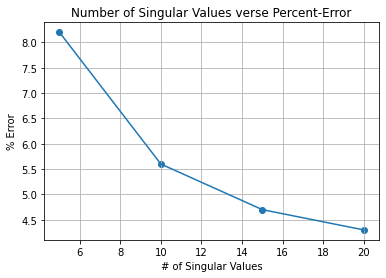

In [37]:
K, percent_error
plt.scatter(K,percent_error)
plt.plot(K,percent_error)
plt.title('Number of Singular Values verse Percent-Error')
plt.ylabel('% Error')
plt.xlabel('# of Singular Values')
plt.grid()

 ii.  Check is all digits are equally easy or difficult to classify.  Also look at some of the difficult ones, and see that in may cases they are very badly written.


1: predicted [3], actual 7


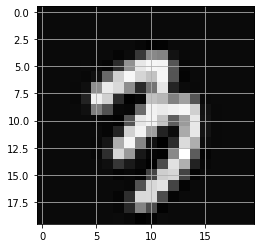

2: predicted [3], actual 1


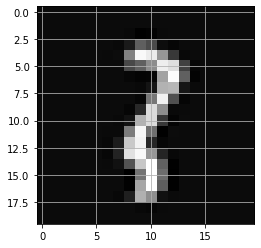

6: predicted [4], actual 9


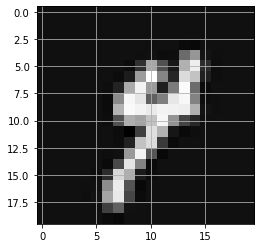

8: predicted [8], actual 6


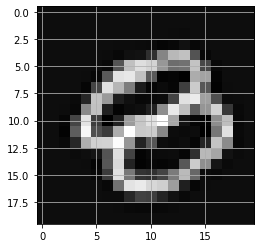

Above we selected some samples showing poor handwriting or initial training mistakes.


In [65]:
interestingCases = [37,110,115,156,193]
ii = [1,2,6,8]

#for i in range(len(misclassified)):
for i in ii:
    print(f'{i}: predicted {misclassified[i][1]}, actual {misclassified[i][2]}')
    show(vdata[misclassified[i][0]])
    plt.show()
  
print('Above we selected some samples showing poor handwriting or initial training mistakes.')

 
 iii. Check the singular values of the different classes.  Is there evidence to support using different number of basis for different digits?

In [101]:
minLen = 400

#figs = 2
min_val = 10  # sigma threshold 
print(f'Find number of non-zero singular values: (sigma_min = {min_val})')
ii = 0
for v in val:   # val is our sigma for each digit
    s = list(v[1])
    ss = [i for i in s if i > min_val]
    print(f'{ii}: {len(ss)}'); ii+=1
    minLen = min(len(ss),minLen)
#print(f'The least number of non-zero sigma was {minLen}. *Later we discover 20 is the sweet spot. (Eckard-Young [1936])') 

print("Yes, some digits like '1' need very few signular values, while others such as '2' need a full rank.\n")
print("See: Eckard-Young Theorem [1936]")
print("See also: https://en.wikipedia.org/wiki/Low-rank_approximation")

Find number of non-zero singular values: (sigma_min = 10)
0: 16
1: 7
2: 20
3: 17
4: 16
5: 18
6: 15
7: 13
8: 18
9: 15
Yes, some digits like '1' need very few signular values, while others such as '2' need a full rank.

See: Eckard-Young Theorem [1936]
See also: https://en.wikipedia.org/wiki/Low-rank_approximation


### B. Implement the following two-stage algorithm:
In the first stage compare the unknown digit only to the first singular vector in each class.  If for one class/digit the residual is significantly smaller than the other, classify as that digit.  Otherwise perform the algorithm above.  

Is it possible to get as good a result for this version?  FIXME!!!

How frequently is the second stage necessary? FIXME!!!

###  Appendix 1. SVD References

https://www.tutorialexample.com/calculate-singular-value-decomposition-svd-using-numpy-numpy-example/

https://cmdlinetips.com/2019/05/singular-value-decomposition-svd-in-python/

... FIXME add more notes and images used

### Appendix 2. Animate Samples

In [11]:
# animate some samples to show what we're dealing with  #FIXME missing 'r' array and add directory of images

"""
from matplotlib.animation import FuncAnimation, PillowWriter
from os.path import exists
filename = "handwritting.gif"
    
fig, ax = plt.subplots()

def init():
    plt.grid()
    plt.gca().set_aspect("equal") 

def update(i):
    r = t[i]  # 't' is our random training set from above
    show(r)
    
ani = FuncAnimation(fig, update, range(10), init_func=init)  
writer = PillowWriter(fps=25)  
ani.save(filename, writer=writer)
plt.show()
"""

'\nfrom matplotlib.animation import FuncAnimation, PillowWriter\nfrom os.path import exists\nfilename = "handwritting.gif"\n    \nfig, ax = plt.subplots()\n\ndef init():\n    plt.grid()\n    plt.gca().set_aspect("equal") \n\ndef update(i):\n    r = t[i]  # \'t\' is our random training set from above\n    show(r)\n    \nani = FuncAnimation(fig, update, range(10), init_func=init)  \nwriter = PillowWriter(fps=25)  \nani.save(filename, writer=writer)\nplt.show()\n'

### Appendix 3. Show Animated Samples
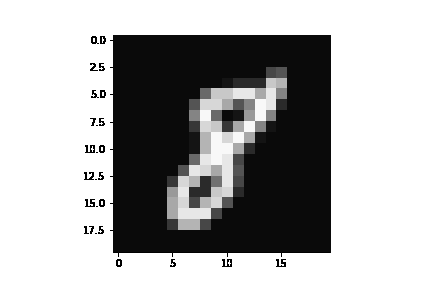